In [2]:
from matplotlib import gridspec

# Using add_subplot and add_axes

source: https://stackoverflow.com/a/43330553/1273751

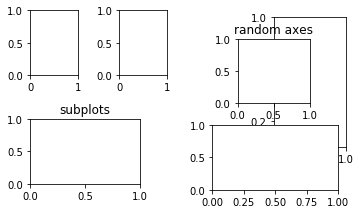

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)

fig = plt.figure()
fig.add_subplot(241)
fig.add_subplot(242)
ax = fig.add_subplot(223)  # uses a different layout (2x2), to make it bigger
ax.set_title("subplots")

fig.add_axes([0.77,.3,.2,.6]) # [left, bottom, width, height]
ax2 =fig.add_axes([0.67,.5,.2,.3])
fig.add_axes([0.6,.1,.35,.3])
ax2.set_title("random axes")

plt.tight_layout()
plt.show()

# Using subplot2grid

<BarContainer object of 4 artists>

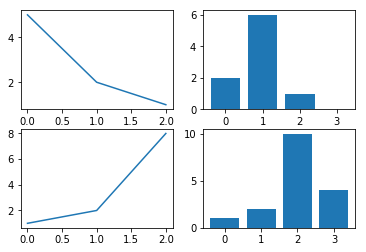

In [19]:
fig = figure()

plt.subplot2grid((2,2), (0,0))
plot([5,2,1])

plt.subplot2grid((2,2), (0,1))
bar(range(3), [2,6,1])
xlim(-.6,3.5)

plt.subplot2grid((2,2), (1,0))
plot([1,2,8])

plt.subplot2grid((2,2), (1,1))
bar(range(4), [1,2,10, 4])

Diferent sizes using colspan and subplot2grid, no need for gridspec

* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html
* https://matplotlib.org/3.1.1/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py

<BarContainer object of 4 artists>

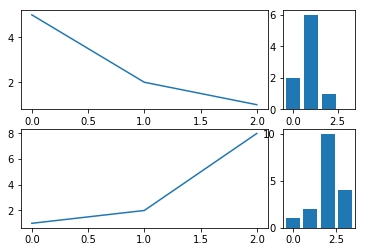

In [18]:
fig = figure()

plt.subplot2grid((2,4), (0,0), colspan=3)
plot([5,2,1])

plt.subplot2grid((2,4), (0,3), colspan=1)
bar(range(3), [2,6,1])
xlim(-.6,3.5)

plt.subplot2grid((2,4), (1,0), colspan=3)
plot([1,2,8])

plt.subplot2grid((2,4), (1,3), colspan=1)
bar(range(4), [1,2,10, 4])

# Now using gridspec

<BarContainer object of 4 artists>

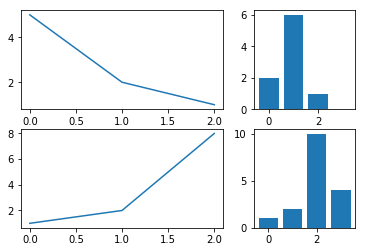

In [28]:
fig = figure()
gs = gridspec.GridSpec(2, 2,
                            figure=fig,
                            width_ratios=[2, 1],
                            **{#'left': 0.1,
                            #'right': 0.85,
                            #'top': FIG_TOP,
                            #'bottom': FIG_BOTTOM,
                            'wspace': 0.2,
                            'hspace': 0.2})

fig.add_subplot(gs[0,0])
plot([5,2,1])

fig.add_subplot(gs[0,1])
bar(range(3), [2,6,1])
xlim(-.6,3.5)

fig.add_subplot(gs[1,0])
plot([1,2,8])

fig.add_subplot(gs[1,1])
bar(range(4), [1,2,10, 4])

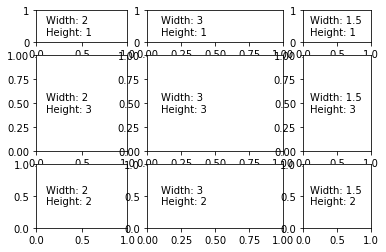

In [7]:
fig5 = plt.figure(constrained_layout=False)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

## Nested grids
source: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/gridspec_nested.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-nested-py

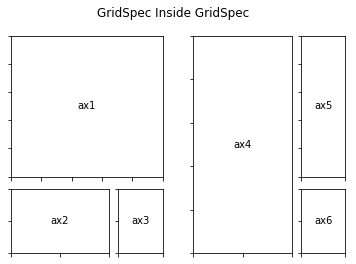

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


# gridspec inside gridspec
f = plt.figure()

gs0 = gridspec.GridSpec(1, 2, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

ax1 = f.add_subplot(gs00[:-1, :])
ax2 = f.add_subplot(gs00[-1, :-1])
ax3 = f.add_subplot(gs00[-1, -1])

# the following syntax does the same as the GridSpecFromSubplotSpec call above:
gs01 = gs0[1].subgridspec(3, 3)

ax4 = f.add_subplot(gs01[:, :-1])
ax5 = f.add_subplot(gs01[:-1, -1])
ax6 = f.add_subplot(gs01[-1, -1])

plt.suptitle("GridSpec Inside GridSpec")
format_axes(f)

## Control axis size using subplots function

adapted from
* https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html

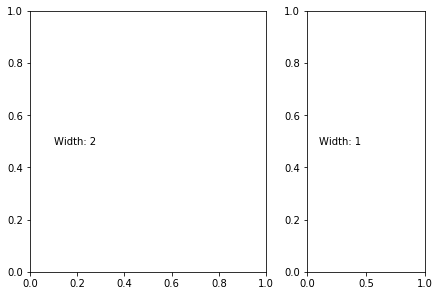

In [29]:
widths = [2,1]
gs_kw = dict(width_ratios=widths)
fig6, f6_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, gridspec_kw=gs_kw)
for c, ax in enumerate(f6_axes):
    label = 'Width: {}'.format(widths[c])
    ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

## Showing fine tuning with constrained layout=True

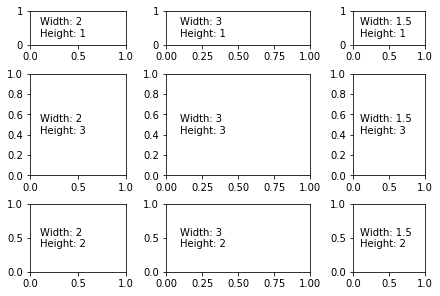

In [33]:
fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

#### When constrained layout is removed the labels overlap each other:

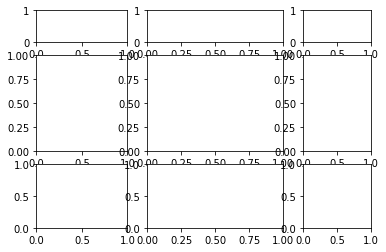

In [44]:
fig5 = plt.figure()
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

## Some potentially useful space tuning tweaks:

To manually change axis position in matplotlib
    
`ax.set_position()`

to try to do it automatically:

`plt.figure(constrained_layout=True)`

also:

`plt.subplots_adjust(wspace=1.5)`

## Hierarchical labels

Code shown below from: https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling-in-matplotlib-python

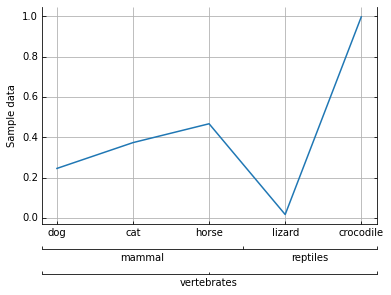

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost

fig1 = plt.figure()
ax1 = SubplotHost(fig1, 111)
fig1.add_subplot(ax1)

# Some data
x = np.arange(1,6)
y = np.random.random(len(x))

# First X-axis
ax1.plot(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['dog', 'cat', 'horse', 'lizard', 'crocodile'])
# ax1.xaxis.set_label_text('First X-axis') # Uncomment to label axis
ax1.yaxis.set_label_text("Sample data")

# Second X-axis
ax2 = ax1.twiny()
offset = 0, -25 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["bottom"] = new_axisline(loc="bottom", axes=ax2, offset=offset)
ax2.axis["top"].set_visible(False)
ax2.axis["bottom"].minor_ticks.set_ticksize(0)  # to remove tick above mammal and reptiles

ax2.set_xticks([0.0, 0.6, 1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.3, 0.8]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

# Third X-axis
ax3 = ax1.twiny()
offset = 0, -50
new_axisline = ax3.get_grid_helper().new_fixed_axis
ax3.axis["bottom"] = new_axisline(loc="bottom", axes=ax3, offset=offset)
ax3.axis["top"].set_visible(False)

ax3.set_xticks([0.0, 1.0])
ax3.xaxis.set_major_formatter(ticker.NullFormatter())
ax3.xaxis.set_minor_locator(ticker.FixedLocator([0.5]))
ax3.xaxis.set_minor_formatter(ticker.FixedFormatter(['vertebrates']))

ax1.grid(1)
plt.show()

Now for y-axis

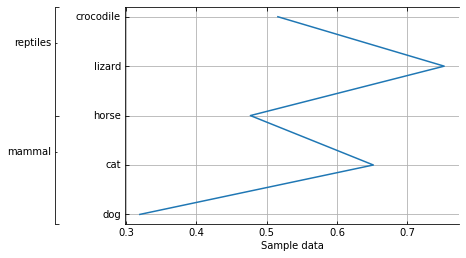

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost

fig1 = plt.figure()
ax1 = SubplotHost(fig1, 111)
fig1.add_subplot(ax1)

# Some data
y = np.arange(1,6)
x = np.random.random(len(y))

# First X-axis
ax1.plot(x, y)
ax1.set_yticks(y)
ax1.set_yticklabels(['dog', 'cat', 'horse', 'lizard', 'crocodile'])
# # ax1.yaxis.set_label_text('First X-axis') # Uncomment to label axis
ax1.xaxis.set_label_text("Sample data")

# Second X-axis
ax2 = ax1.twinx()
offset = -70, 0 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["left"] = new_axisline(loc="left", axes=ax2, offset=offset)
ax2.axis["right"].set_visible(False)

ax2.set_yticks([0.0, 3, 6])
ax2.yaxis.set_major_formatter(ticker.NullFormatter())
ax2.yaxis.set_minor_locator(ticker.FixedLocator([2, 5]))
ax2.yaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

ax1.grid(1)
plt.show()

In [30]:
help(ax1.twinx)

Help on method twinx in module mpl_toolkits.axes_grid1.parasite_axes:

twinx(axes_class=None) method of matplotlib.axes._subplots.AxesHostAxesSubplot instance
    Create a twin of Axes with a shared x-axis but independent y-axis.
    
    The y-axis of self will have ticks on the left and the returned axes
    will have ticks on the right.



Another option here: https://stackoverflow.com/questions/44484391/how-to-add-hierarchical-axis-across-subplots-in-order-to-label-groups/44486955#44486955

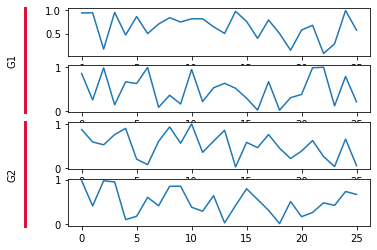

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


data = np.random.rand(26,4)
for i in range(4):
    plt.subplot(4,1,i+1)
    axes = plt.plot(data[:,i])
    
# df = pd.DataFrame(np.random.rand(26,4), columns=list("ABCD"))
# axes = df.plot(subplots=True)

fig = axes[0].figure
axes = fig.axes


gs = gridspec.GridSpec(4,2)
gs.update(left=0.1, right=0.48, wspace=0.05)
fig.subplots_adjust(left=.2)

for i, ax in enumerate(axes):
    ax.set_subplotspec(gs[i,1])

aux1 = fig.add_subplot(gs[:2,0])
aux2 = fig.add_subplot(gs[2:,0])

aux1.set_ylabel("G1")
aux2.set_ylabel("G2")

for ax in [aux1, aux2]:
    ax.tick_params(size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_facecolor("none")
    for pos in ["right", "top", "bottom"]:
        ax.spines[pos].set_visible(False)
    ax.spines["left"].set_linewidth(3)
    ax.spines["left"].set_color("crimson")


plt.show()